In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
df.shape

(3755, 11)

In [5]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [6]:
df.isnull().sum()  # no missing data

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.drop("salary",inplace=True,axis=1)
df.drop("salary_currency",inplace=True,axis=1)

In [8]:
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [9]:
df["experience_level"].replace({"EN": "Junior",
                                "MI": "Mid Level",
                                "SE": "Senior",
                                "EX": "Executive Level"},inplace=True)

df["company_size"].replace({"S": "Small",
                            "M": "Medium",
                            "L": "Large"}, inplace=True)

In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,FT,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Mid Level,CT,ML Engineer,30000,US,100,US,Small
2,2023,Mid Level,CT,ML Engineer,25500,US,100,US,Small
3,2023,Senior,FT,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,FT,Data Scientist,120000,CA,100,CA,Medium


In [11]:
df["work_year"].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

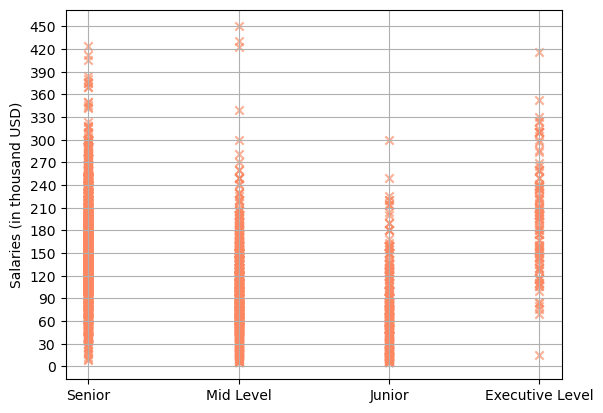

In [12]:
# Comparison of employees' salaries and position levels

minSalary =  df["salary"].min()
maxSalary =  df["salary"].max()
salaryTicks = range(int(minSalary//10000)*10000, int(maxSalary//10000 + 1)*10000, 30000)

plt.scatter(df["experience_level"],df["salary"], color="#fc8760", alpha=0.65, marker="x")
plt.ylabel("Salaries (in thousand USD)")
plt.yticks(salaryTicks, [(tick//1000) for tick in salaryTicks])
plt.grid(True)

plt.show()

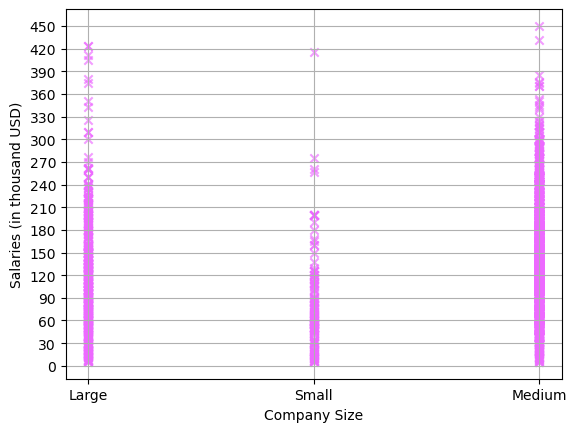

In [13]:
# Comparison between company size and salaries

plt.scatter(df["company_size"],df["salary"], color="#ed69ff", alpha=0.65, marker="x")
plt.ylabel("Salaries (in thousand USD)")
plt.yticks(salaryTicks, [(tick//1000) for tick in salaryTicks])
plt.grid(True)
plt.xlabel("Company Size")

plt.show()

In [14]:
# Because there are too many locations, I filtered out places with 4 and more than 4 values.

locations = []
for num in range(len(df["company_location"].value_counts())):
    if df["company_location"].value_counts().iloc[num] >= 4:
        locations.append(df["company_location"].value_counts().index[num])

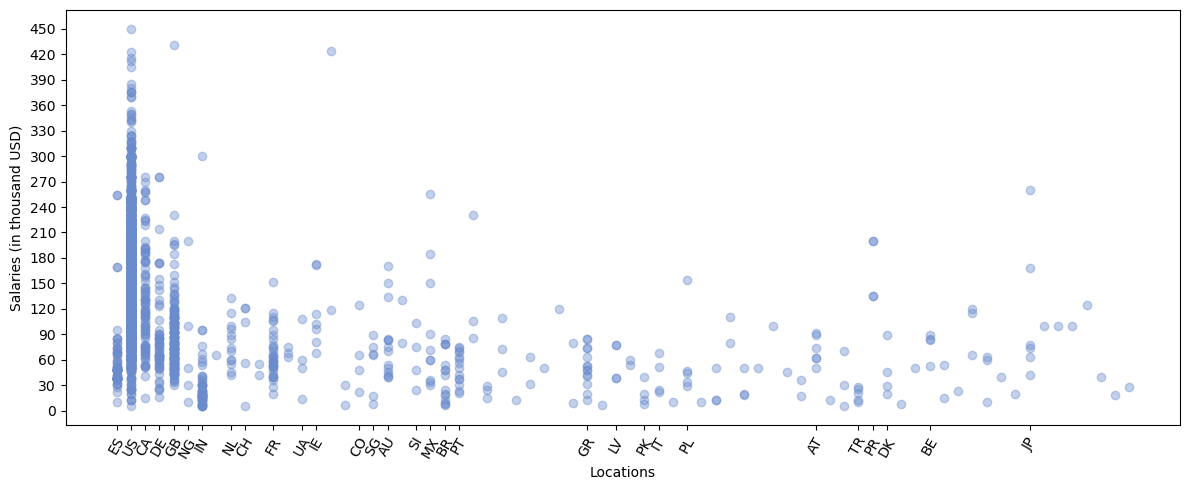

In [15]:
plt.figure(figsize=(12,5))
plt.scatter(df["company_location"],df["salary"], color="#6a8bcc", alpha=0.4, marker="o")
plt.ylabel("Salaries (in thousand USD)")
plt.yticks(salaryTicks, [(tick//1000) for tick in salaryTicks])
plt.xlabel("Locations")
plt.xticks(ticks=locations, rotation=60)

plt.tight_layout()
plt.show()

In [31]:
# 10 job titles with the most data in the dataset

jobs2023 = df[(df["work_year"]==2023)]["job_title"].value_counts().nlargest(10)
jobs2023

job_title
Data Engineer                499
Data Scientist               370
Data Analyst                 307
Machine Learning Engineer    158
Research Scientist            55
Data Architect                52
Analytics Engineer            46
Applied Scientist             40
Research Engineer             32
Data Manager                  22
Name: count, dtype: int64

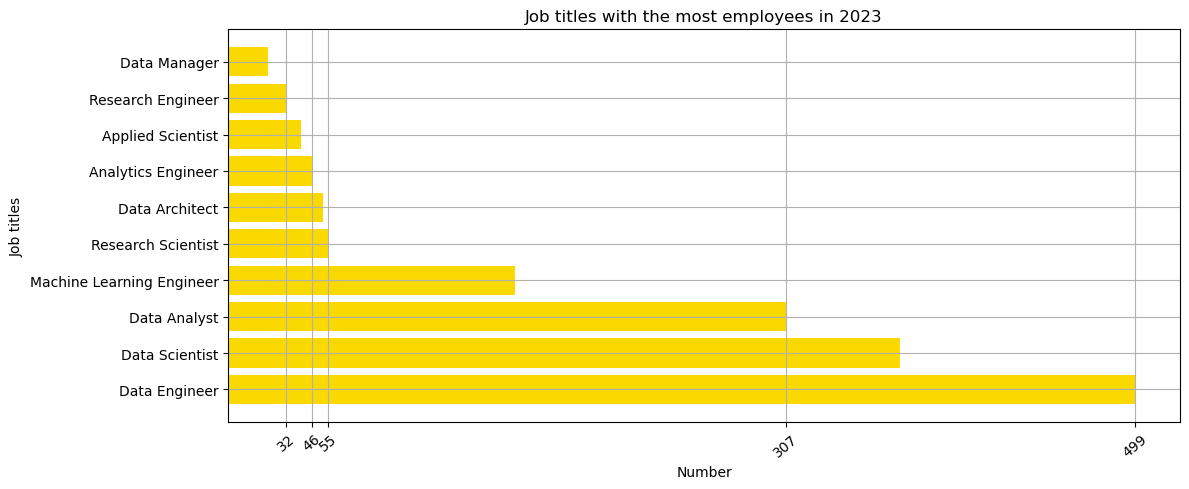

In [32]:
plt.figure(figsize=(12,5))
plt.barh(jobs2023.index, jobs2023, color="#fad900")
plt.xlabel("Number")
plt.ylabel("Job titles")
plt.grid(True)
plt.xticks(jobs2023[::2], rotation=40)
plt.title("Job titles with the most employees in 2023")

plt.tight_layout()
plt.show()

In [33]:
# This code reaches top 10 job title

jobs = df["job_title"].value_counts().nlargest(10)
top = []
num = 0
for i in jobs.index:
    top.append(i)
    num += 1
    
print(top)

['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect', 'Research Scientist', 'Data Science Manager', 'Applied Scientist', 'Research Engineer']


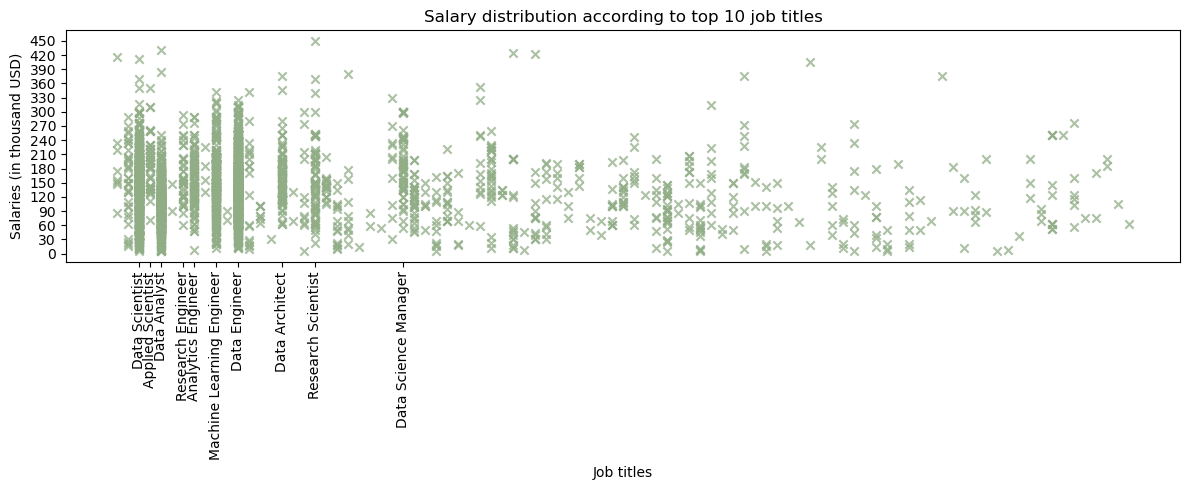

In [39]:
plt.figure(figsize=(12,5))
plt.scatter(df["job_title"], df["salary"], color="#90ad86", marker="x", alpha=0.75)
plt.ylabel("Salaries (in thousand USD)")
plt.xlabel("Job titles")
plt.title("Salary distribution according to top 10 job titles")
plt.yticks(salaryTicks, [(tick//1000) for tick in salaryTicks])
plt.xticks(top, rotation=90)

plt.tight_layout()
plt.show()